<h1>Exploring the Dynamics of Crime in South Africa (2011-2023)</h1>

In [78]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")


In [79]:
file_path = 'C:/Users/Admin/Documents/Documents/Books/My important documents/Python/Projects/Specific Projects/South Africa Crime 2010-2023.xlsx'

excel_file = pd.ExcelFile(file_path)

sheet_names = excel_file.sheet_names

for sheet_name in sheet_names:
    crime = pd.read_excel(file_path, sheet_name=sheet_name)
    
    print(f"\nSheet: {sheet_name}")
    
    crime


Sheet: Crime incidents by category

Sheet: Contact crime incidents by cate

Sheet: Sexual offence incidents by cat

Sheet: Aggravated robbery incidents by

Sheet: Contact related crime incidents

Sheet: Property related crime incident

Sheet: Other serious crime incidents b

Sheet: Crimes detected as a result of 


In [80]:
sheet_name = 'Crime incidents by category'
crime_incid = pd.read_excel(file_path, sheet_name=sheet_name)
crime_incid.head(2)


,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724


In [81]:
crime_incid.shape

(840, 4)

In [82]:
crime_incid.dtypes

Geography         object
Crime Category    object
Financial Year    object
Count              int64
dtype: object

In [83]:
crime_incid['Crime Category'].unique()

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

In [84]:
geo = crime_incid['Geography'].unique()
geo

array(['ZA', 'EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

In [85]:
crime_incid.rename(columns={'Count': 'Total'}, inplace=True)
crime_incid.rename(columns={'Geography': 'Province'}, inplace=True)
crime_incid.rename(columns={'Financial Year': 'Year'}, inplace=True)


In [86]:
crime_incid.drop(crime_incid[crime_incid['Province'] == 'ZA'].index, inplace=True)


In [87]:
crime_incid['Crime Category'] = crime_incid['Crime Category'].astype(str)
crime_incid['Total'] =crime_incid['Total'].astype(float)



In [88]:
crime_incid['Province'] = crime_incid['Province'].replace({'EC': 'Eastern Cape', 'FS': 'Free State', 'GT': 'Gauteng',
                                                            'KZN':'KwaZulu-Natal', 'LIM':'Limpopo','MP':'Mpumalanga'
                                          ,'NW':'North West', 'NC':'Nothern Cape','WC':'Western Cape'})


In [89]:
crime_incid.head(5)

,Province,Crime Category,Year,Total
10,Eastern Cape,Contact Crimes,2011/2012,75779.0
11,Eastern Cape,Contact Crimes,2012/2013,72650.0
12,Eastern Cape,Contact Crimes,2013/2014,73032.0
13,Eastern Cape,Contact Crimes,2014/2015,68654.0
14,Eastern Cape,Contact Crimes,2015/2016,67258.0


In [90]:
drop= crime_incid.drop_duplicates

In [91]:
crime.isnull().sum()

Geography                                      0
Crime Detected as a Result of Police Action    0
Financial Year                                 0
Count                                          0
dtype: int64

In [92]:
group_year = crime_incid.groupby('Year')['Total'].sum().reset_index()

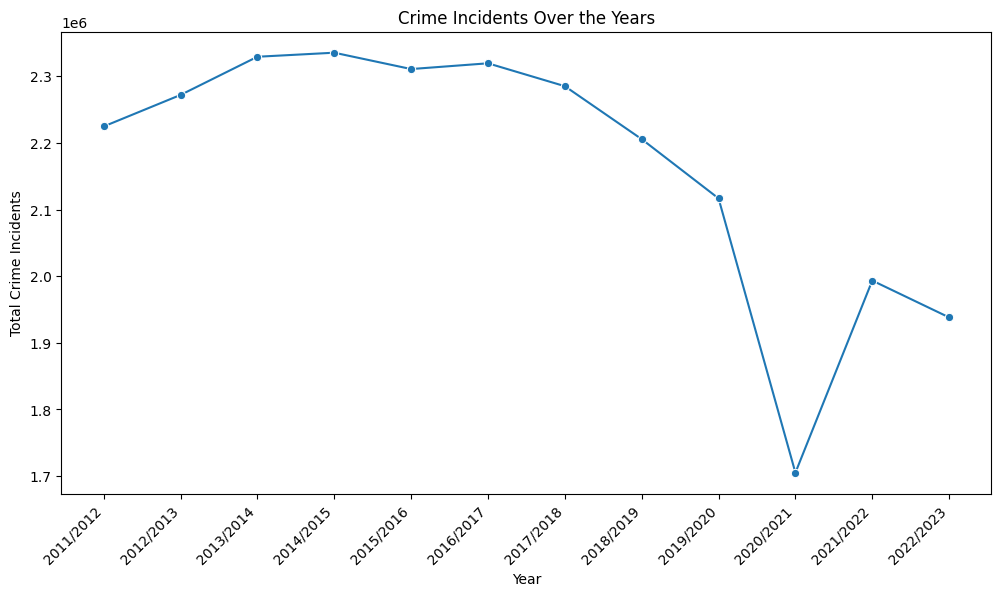

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=group_year, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title('Crime Incidents Over the Years')
plt.xticks(rotation=45, ha='right') 

plt.show()

In [94]:
group_crime_and_year = crime_incid.groupby(['Crime Category', 'Year'])['Total'].sum().reset_index()

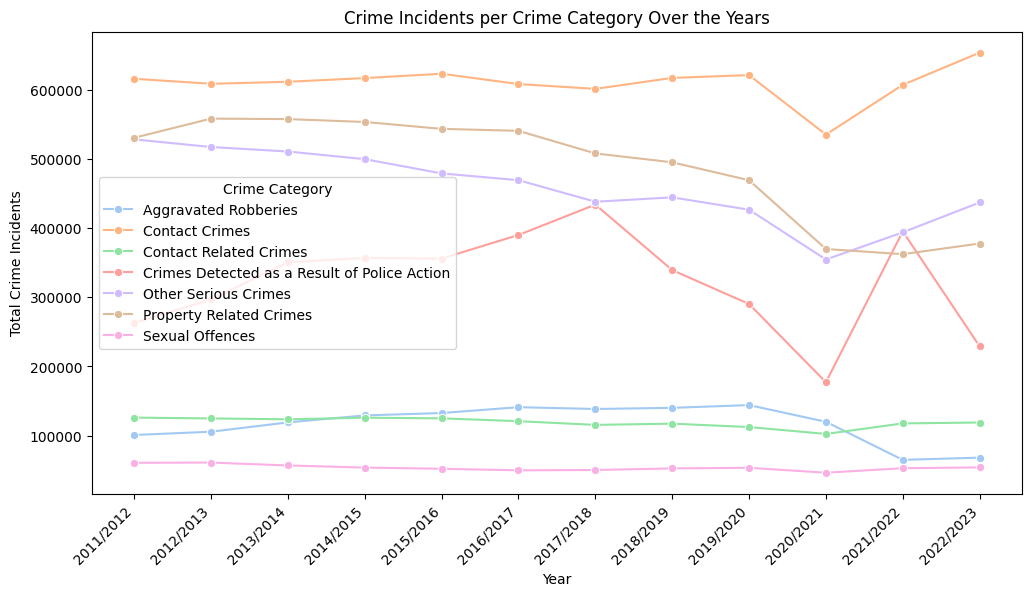

In [111]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', hue='Crime Category', data=group_crime_and_year, palette='pastel', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title('Crime Incidents per Crime Category Over the Years')
plt.legend(title='Crime Category')
plt.xticks(rotation=45, ha='right') 

plt.show()

In [96]:
crime_incid.describe()

,Total
count,756.000000
mean,34440.037037
std,39131.115933
min,377.000000
25%,7166.000000
50%,20919.000000
75%,37839.750000
max,204990.000000


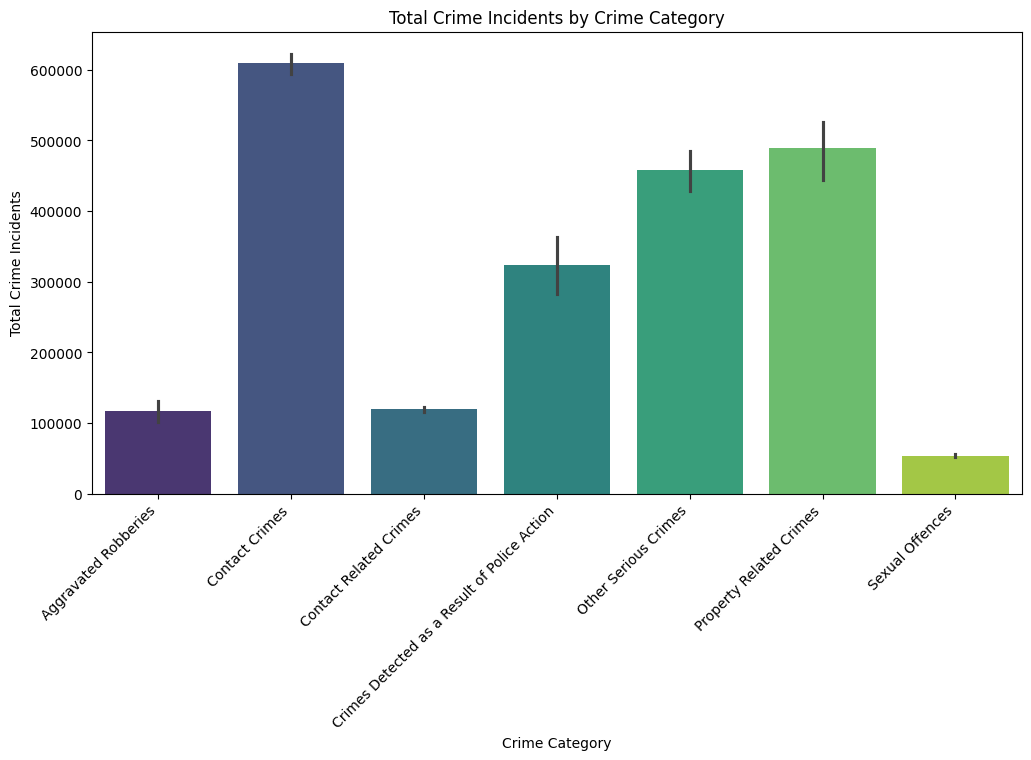

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Crime Category', y='Total', data=group_crime_and_year, palette='viridis')

plt.xlabel('Crime Category')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents by Crime Category')

plt.xticks(rotation=45, ha='right')  

plt.show()

In [98]:
province_and_total = crime_incid[['Province', 'Total']]
province_and_total.head(3)

,Province,Total
10,Eastern Cape,75779.0
11,Eastern Cape,72650.0
12,Eastern Cape,73032.0


In [99]:
group_Province_to_Total = crime_incid.groupby('Province')['Total'].sum().reset_index()

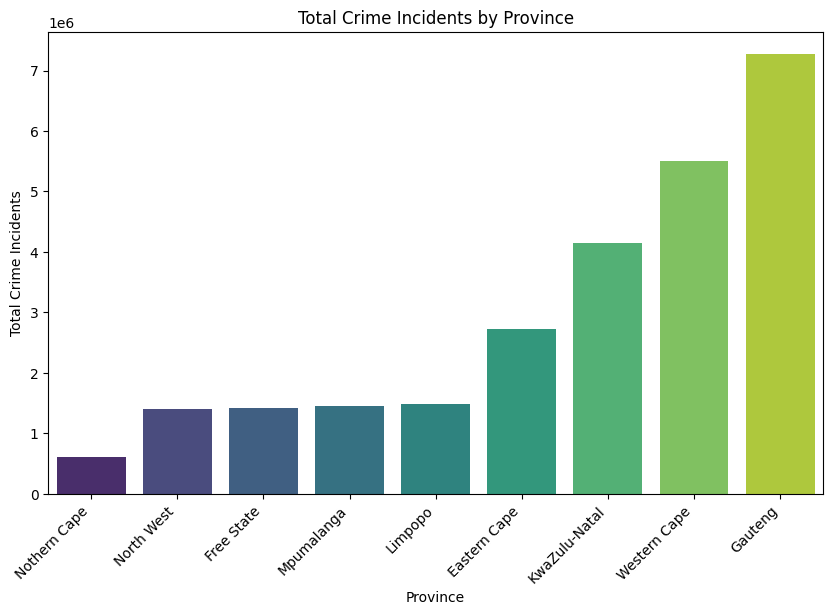

In [112]:
group_Province_to_Total = group_Province_to_Total.sort_values(by='Total')

plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total', data=group_Province_to_Total, palette='viridis')

plt.xlabel('Province')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents by Province')
plt.xticks(rotation=45, ha='right') 

plt.show()

In [101]:
sa_provinces = gpd.read_file(r'C:/Users/Admin/Documents/Documents/Books/My important documents/zaf_adm_sadb_ocha_20201109_shp/sa_provinces.shp')


In [102]:
sa_provinces.rename(columns={"ADM1_EN": "Province"}, inplace=True)

In [103]:
sa_provinces.head(2)

,Shape_Leng,Shape_Area,Province,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,ADM1_ID,geometry
0,28.227301,16.154668,Eastern Cape,ZA2,None,None,None,South Africa,ZA,2018-12-27,2020-11-09,None,EC,"POLYGON ((29.02187 -30.00443, 29.02401 -30.005..."
1,24.249857,11.979428,Free State,ZA4,None,None,None,South Africa,ZA,2018-12-27,2020-11-09,None,FS,"POLYGON ((27.97704 -26.67141, 27.97754 -26.671..."


In [104]:
sa_provinces["Province"].unique()

array(['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal',
       'Limpopo', 'Mpumalanga', 'North West', 'Nothern Cape',
       'Western Cape'], dtype=object)

In [105]:
selected_columns = ['Province', 'geometry']
new_df = sa_provinces[selected_columns].drop_duplicates()


In [106]:
joined_df = pd.merge(new_df, crime_incid, on='Province', how='inner')

In [107]:
joined_df.tail(2)

,Province,geometry,Crime Category,Year,Total
754,Western Cape,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -...",Other Serious Crimes,2022/2023,96174.0
755,Western Cape,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -...",Crimes Detected as a Result of Police Action,2022/2023,79106.0


In [108]:
group_province_to_total = joined_df.groupby(['Province', 'geometry'])['Total'].sum().reset_index()

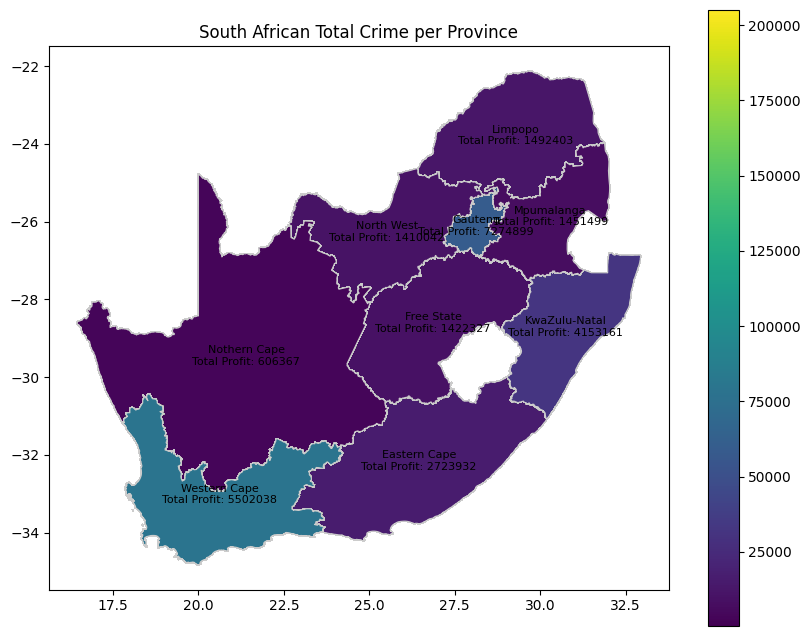

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

joined_df.plot(column='Total', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

centroids = joined_df.geometry.centroid

for province, total in zip(group_province_to_total['Province'], group_province_to_total['Total']):
    province_geom = joined_df[joined_df['Province'] == province].geometry.iloc[0]
    x, y = province_geom.centroid.x, province_geom.centroid.y
    ax.text(x, y, f'{province}\nTotal Profit: {total:.0f}', fontsize=8, ha='center', va='center', color='black')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('South African Total Crime per Province')

plt.show()